
<h1>
    <bold>
        <center> Restaurant Recommendation System </center>
    </bold>
</h1>
<center>
<table border=0>
    <tr>
        <th align="left">Group Member</th>
        <th align="left">Email</th>
        <th align="left">NU ID</th>
    <tr>
        <td align="left">Vikas Singh</td>
        <td align="left">singh.vika@husky.neu.edu</td>
        <td align="left">001821392</td>
    </tr>
    
    <tr>
        <td align="left">Ashish Aggarwal</td>
        <td align="left">aggarwal.ash@husky.neu.edu</td>
        <td align="left">001241945</td>
    </tr>
    
    <tr>
        <td align="left">Syed Haroon Perveez</td>
        <td align="left">perveez.s@husky.neu.edu</td>
        <td align="left">001824956</td>
    </tr>
    
</table>

</center>

# Summary
Most recommendation systems (even that of Yelp) would provide recommendations based on factors such as user location, user preference (manually fed to the system), and type of cuisine of a restaurant. While such recommendation systems work pretty effectively, they fail to factor in the sentiment of the business towards particular food item for which the user is interested in. For example, a business which has "pizza" in its category and has a good overall rating may be recommended to a user looking for pizza places. 

The problem with such kind of approach is that this does not factor in how actually good are the pizzas of that particualr business. The business may garner positive reviews but those reviews may not necessarily be for pizza. This means that the user might be recommended a pizza place which does not actually serve good pizzas. 

Our spin to building a recommendation system involves factoring in sentiment of food items served by a business in which the user actually is interested in. This leads to more focussed and personalized recommendations. For this project, we have chosen to work on the Yelp Data set which includes information about businesses, users and reviews written by users for business. As the data set includes information about businesses accross all domains, we have extracted only a subset of data related to Food only. 

Another area which our project focusses on is understanding the dynamics of the ratings received by businesses. In other words, if a user has written the review, what rating is the user likely to give the business against that rating. This can help businesses better understand their customers and work towards improving thei ratings.

As we go through this notebook, we will cover all steps involved towards building our Recommendation system.

# Use Case 1 : Recommendation System

This part focusses on building the recommendation system

## Step 1 : Exploring the Data set.
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.2.0/jquery.min.js"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>

The entire data set is available in two formats : JSON and SQL, and can be downloaded from : https://www.yelp.com/dataset
We have chosen the JSON version of the data set.
It includes the following files: 

<ol type="1">
    <li><i><b><mark>business.json<b></mark></i><br>
    Contains business data including location data, attributes, and categories.</li><br>
    <img src="img/business schema.png" class="img-rounded"/>
    <br>

    <li><mark><b><i>review.json</b></i></mark><br>
    Contains full review text data including the user_id that wrote the review and the business_id the review is written for.</li><br>
    <img src="img/review schema.png" class="img-rounded">
    <br>

    <li><mark><b><i>user.json</b></i></mark><br>
    User data including the user's friend mapping and all the metadata associated with the user.</li><br>
    <img src="img/user schema.png" class="img-rounded"/>
    <br>

    <li><b><i>checkin.json</b></i><br>
    Checkins on a business.</li><br>
    <img src="img/checkin schema.png" class="img-rounded"/>
    <br>

    <li><b><i>tips.json</b></i><br>
    Tips written by a user on a business. Tips are shorter than reviews and tend to convey quick suggestions</li><br>
    <img src="img/tip schema.png" class="img-rounded"/>
    <br>
</ol>

<br>
Files requires for our project are <mark>business.json</mark>, <mark>review.json</mark> and <mark>user.json</mark>


In [13]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,20)

df=pd.read_json("dataset/slicedReview2.json" , lines = True) 
df.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
useful         0
user_id        0
dtype: int64

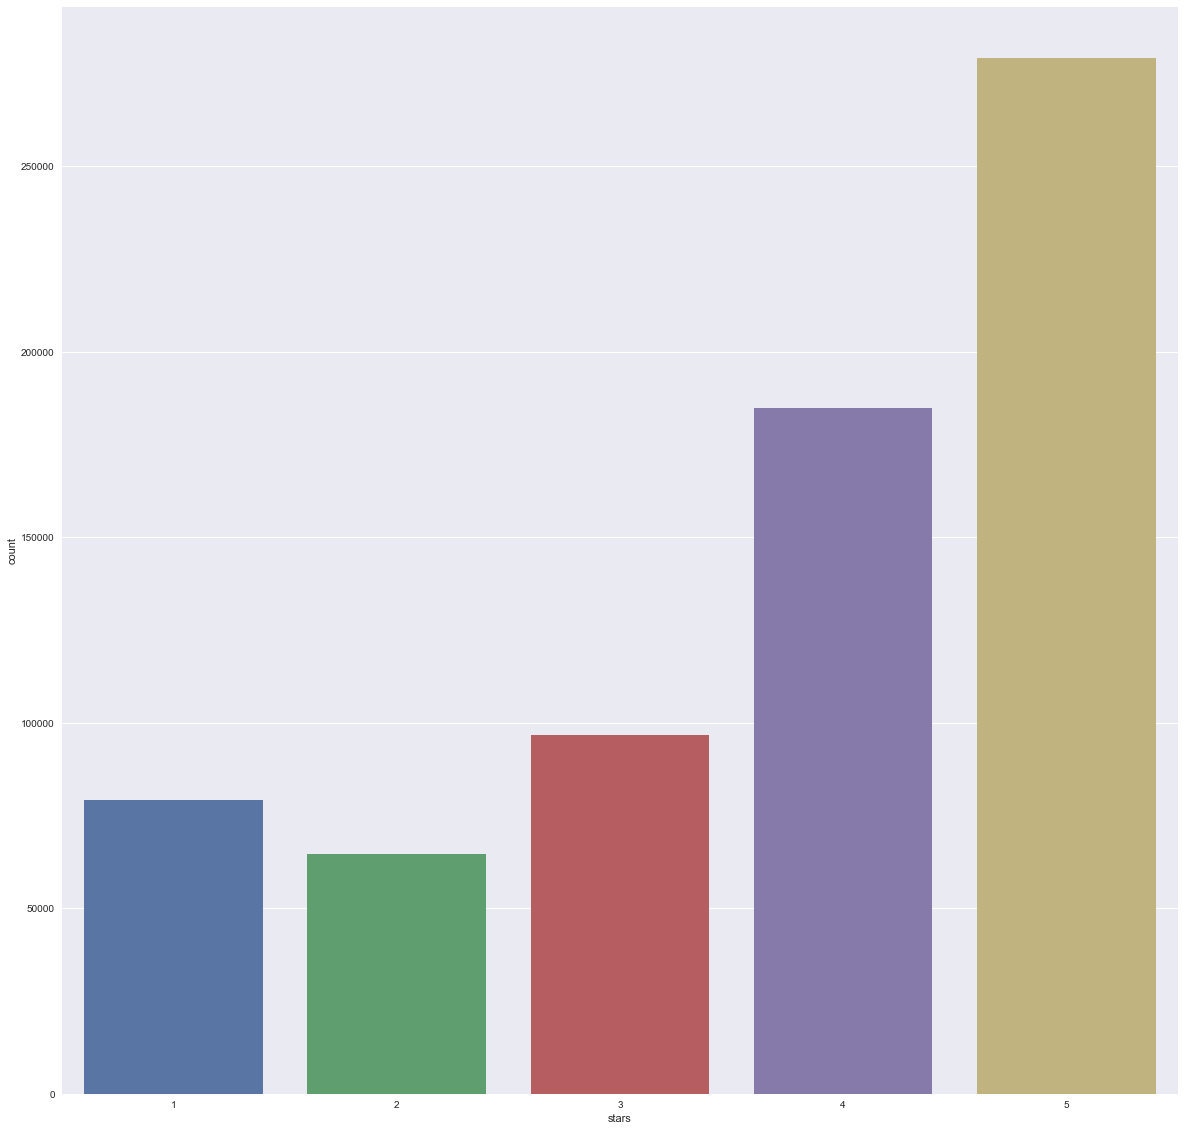

In [14]:
ax = sns.countplot(x='stars', data=df)

In [15]:
avgbusinessRating = df.groupby('business_id', as_index=False)['stars'].mean()
avgbusinessRating

,business_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,4.087113
1,-0BxAGlIk5DJAGVkpqBXxg,3.000000
2,-1vfRrlnNnNJ5boOVghMPA,3.197368
3,-3zffZUHoY8bQjGfPSoBKQ,4.054007
4,-8R_-EkGpUhBk55K9Dd4mg,3.544444
5,-8ZiMXZReeTD3kwEvS0Lww,4.537736
6,-95mbLJsa0CxXhpaNL4LvA,3.719361
7,-9Ir5OiFiOszIgeFgalXcw,3.181818
8,-9YyInW1wapzdNZrhQJ9dg,2.468750
9,-OEIW0dO96-492qa_luxaw,4.029046


In [16]:
btf = business[(business['categories'].astype(str).str.contains('Food')) | (business['categories'].astype(str).str.contains('Restaurants'))| (business['categories'].astype(str).str.contains('Bar'))| (business['categories'].astype(str).str.contains('Bakeries'))]

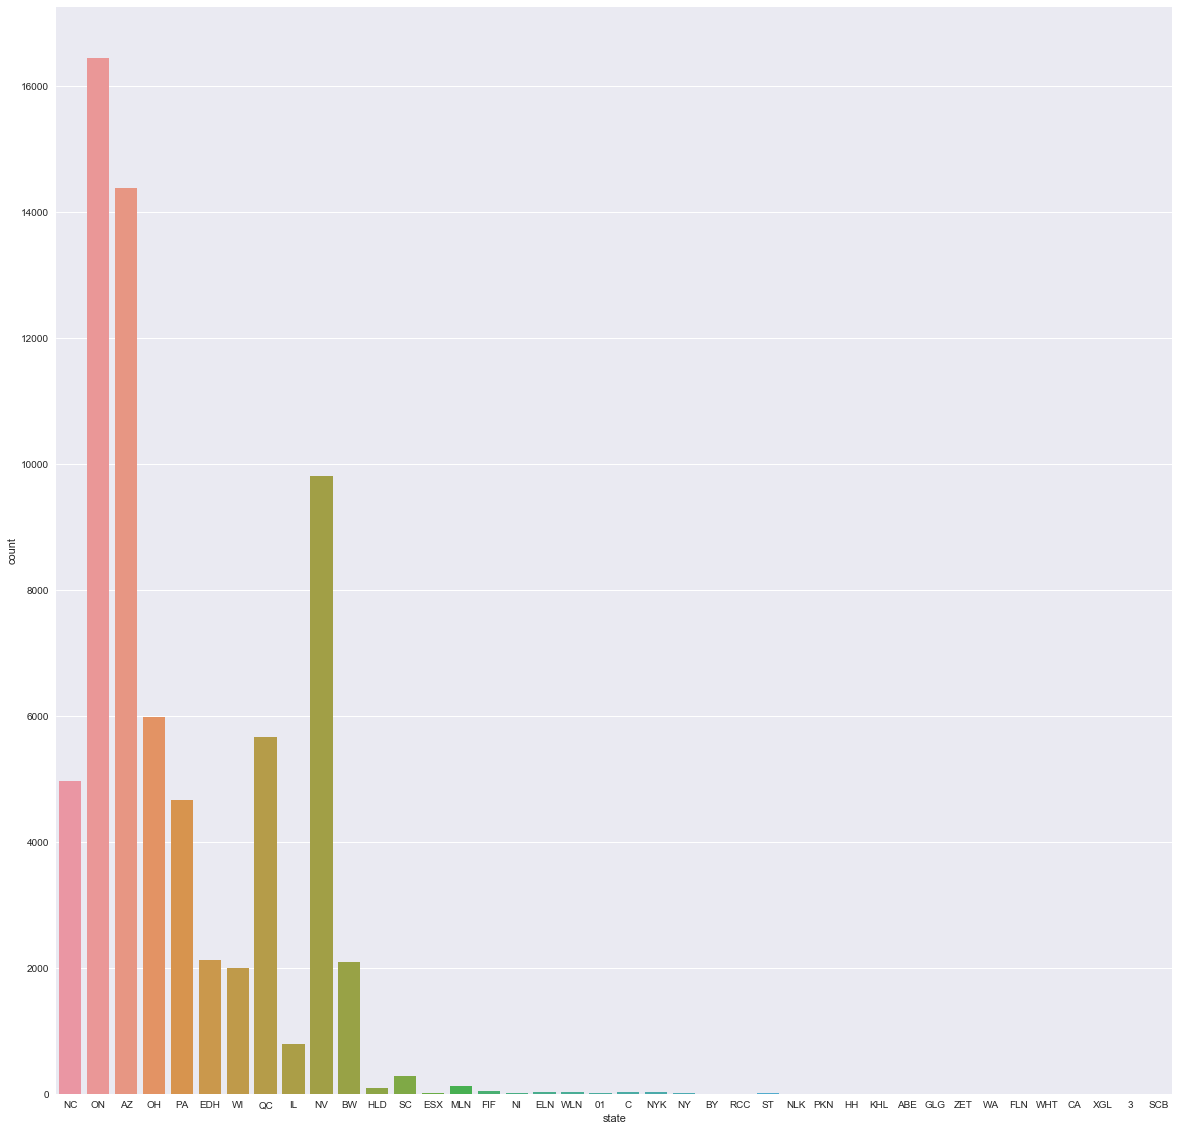

In [17]:
sns.countplot(x='state', data=btf)city = business[(business['state']== "NV")]

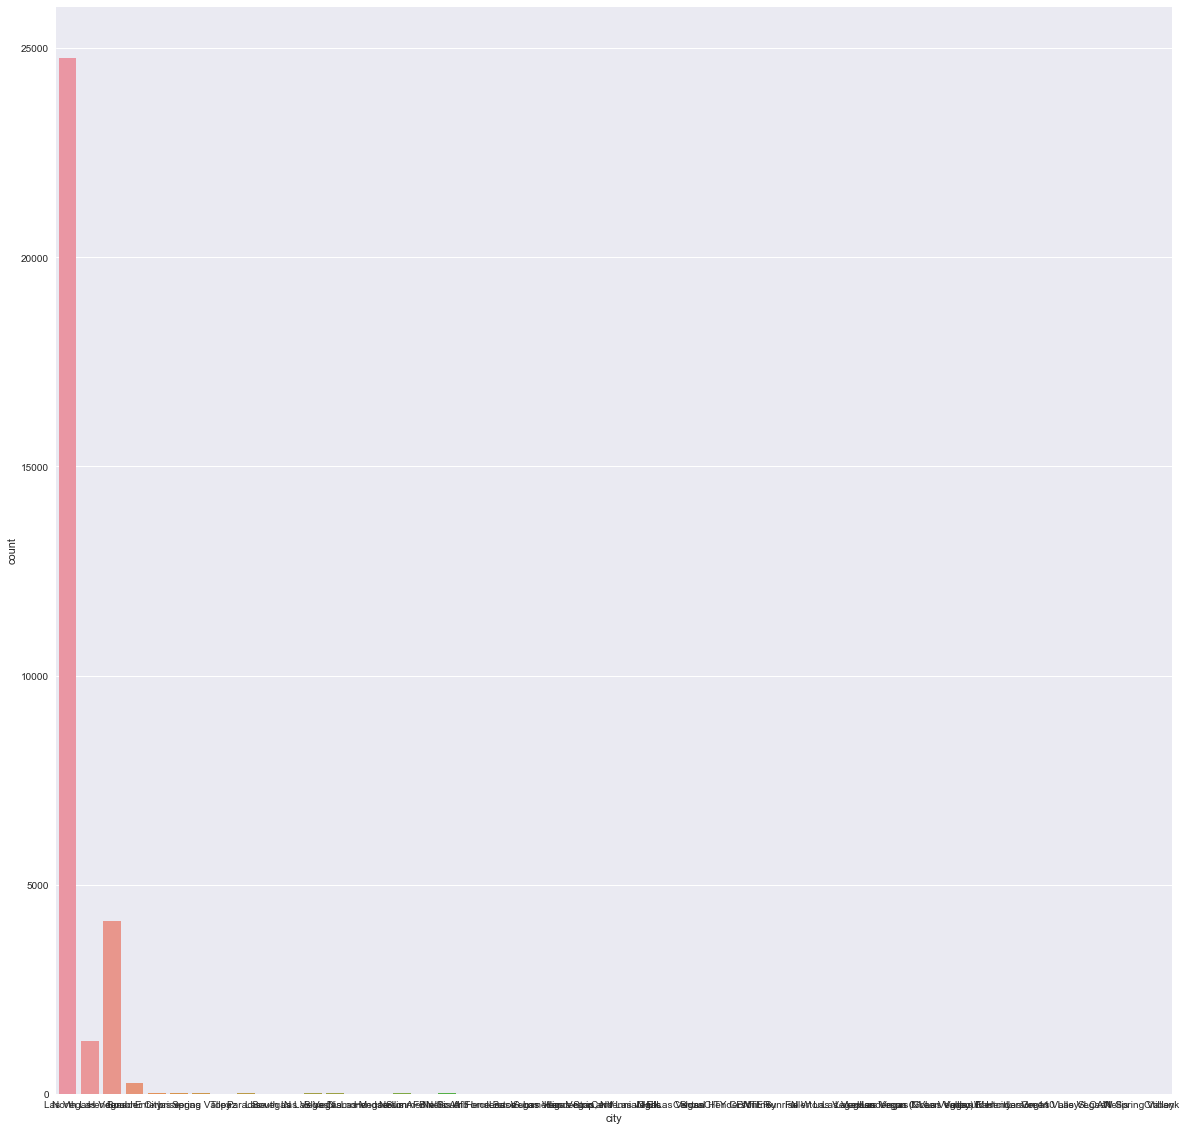

In [18]:
city = business[(business['state']== "NV")]
sns.countplot(x="city",data=city)

## Step 2 : Loading the data.

Due to humongous size of the data set. The data loading operations were quite slow and would often bring the systems down to a crawl. Hence, we have limited the scope to businesses related to <code>Restaurants</code>, <code>Bars</code>, <code>Bakeries</code>, <code>Food</code> in the city of <code>Las Vegas</code>.

We first get all the business_id of businesses in Las Vegas, and then find all reviews for those businesses.

### Step 2.1 : Finding Businesses of Las Vegas

In [40]:
import pandas as pd;

business = pd.read_json("dataset/business.json", lines=True)

bt = business[(business['city']=="Las Vegas")];

btf = bt[(bt['categories'].astype(str).str.contains('Food')) | (bt['categories'].astype(str).str.contains('Restaurants'))| (bt['categories'].astype(str).str.contains('Bar'))| (bt['categories'].astype(str).str.contains('Bakeries'))]

btc = btf[(btf['review_count']>10)];

businessIdsJson = btc['business_id'];
businessIdsJson.to_csv("dataset/businessIds.csv", index=False);

businessIds = pd.read_csv("dataset/businessIds.csv")
businessIds.columns=['business_id']
businessIds.head(n=10)

,business_id
0,DiA78qPtp6rfRNdomzjBbw
1,YTqtM2WFhcMZGeAGA08Cfg
2,Oto60yDwk1z72WmfWEYrjg
3,mUk-0jToBuzk4KaDXp-uew
4,1CP8aJa8ILlfM5deroar0Q
5,gduTP-ujJ89tWOSdb3WMPA
6,_wnAPt7ehpybzQptYKNHxQ
7,TYGVaav4hWZioQlk9Ig78A
8,Wbi-x-1Nbn6LFCMOSN6F5Q
9,W-3Sy3fy85mQdd0ZNFKIiw


### Step 2.2 : Finding reviews of businesses in Las Vegas 

Since the review.json file was humongous and we could not load that data without our systems coming to a halt, we had to use a shell script to filter the reviews of the bussinesses in Las Vegas and saved it to <code>slicedReview2.json</code>




<pre>
bId=$(cat businessIds.csv)
prefix="\"business_id\":\""
suffix="\""
(for word in $bId; 
	do newv=$(echo $word | tr -d '\040\011\012\015') && 
	finalv=$prefix$newv$suffix && 
	echo $finalv && 
	LC_ALL=C fgrep $finalv review.json >> slicedReview2.json; 
done)
</pre>

## Step 3 : Building the recommendation system

We have selected 3 main features against which the restaurants will be recommended
<ul>
<li>Pizza</li>
<li>Burger</li>
<li>Salad</li>
</ul>

The main idea is to track the sentiments of every business review for pizza, burger and salad. <br>
Similarly we track the sentiments of every user written reviews having word pizza, burger and salad. <br>
Then depending on which feature has the most positive sentiment for a user, top 10 businesses with those sentiments would be presented to the user. 

<br><br>
User Sentiment analysis is done using Vader package from the nltk library.


<br>
For this purpose we ceate a dataframe which contains the following columns:<br>
<b>business_id</b>     : Business ID of the business<br>
<b>user_id</b>         : User ID of the user who has written the review<br>
<b>f_pizza</b>         : indicates if the review is about pizza ( 0 or 1)<br>
<b>sent_pizza_comp</b> : compound component score of the review (-1 to 1) if f_pizza is 1 , else 0<br>
<b>sent_pizza_pos</b>  : positive component score of the review (-1 to 1) if f_pizza is 1 , else 0<br>
<b>sent_pizza_neg</b>  : negative component score of the review (-1 to 1) if f_pizza is 1 , else 0<br>
<b>sent_pizza_neu</b>  : neutral  component score of the review (-1 to 1) if f_pizza is 1 , else 0<br>
<b>f_burger</b>        : indicates if the review is about burger ( 0 or 1)<br>
<b>sent_burger_comp</b>: compound component score of the review (-1 to 1) if f_burger is 1 , else 0<br>
<b>sent_burger_pos</b> : positive component score of the review (-1 to 1) if f_burger is 1 , else 0<br>
<b>sent_burger_neg</b> : negatuve component score of the review (-1 to 1) if f_burger is 1 , else 0<br>
<b>sent_burger_neu</b> : neutral component score of the review (-1 to 1) if f_burger is 1 , else 0<br>
<b>f_salad</b>         : indicates if the review is about salad ( 0 or 1)<br>
<b>sent_salad_comp</b> : compound component score of the review (-1 to 1) if f_salad is 1 , else 0<br>
<b>sent_salad_pos</b>  : positive component score of the review (-1 to 1) if f_salad is 1 , else 0<br>
<b>sent_salad_neg</b>  : negative component score of the review (-1 to 1) if f_salad is 1 , else 0<br>
<b>sent_salad_neu</b>  : neutral component score of the review (-1 to 1) if f_salad is 1 , else 0<br>

### Step 3.1 : Generating Review Sentiments for Business against Feature Set [pizza, burger, salad]


We do this iteratively for every feature over every review, then grouping them by business ID ,saving results in separate files for each feature.
Finally we merge all of these on "business_id" which results in the final file

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import pandas as pd
import numpy as np
import re as re
import nltk as nltk

reviews=pd.read_json('slicedReview2.json', lines=True)
sentimentFinal = pd.DataFrame(columns=['business_id','user_id','f_pizza' , 
'sent_pizza_comp' ,'sent_pizza_pos','sent_pizza_neg','sent_pizza_neu', 'f_burger' ,
'sent_burger_comp','sent_burger_pos','sent_burger_neg','sent_burger_neu' , 
'f_salad' , 'sent_salad_comp','sent_salad_pos','sent_salad_neg','sent_salad_neu'])
sentimentAnalyzer = SentimentIntensityAnalyzer()
featureList = ['pizza','burger','salad']


for feature in featureList:
    print("\nFeature: "+str(feature))
    featureReviews = reviews[reviews['text'].str.contains(str(feature))]
    reviewCount = 0;
    for review in featureReviews.itertuples():
        print("reviewCount: "+str(reviewCount) +" Feature : "+ str(feature))
        reviewText = review[7]
        row=[]
        row.append(str(review[1]))
        row.append(str(review[9]))
        featureIndex = featureList.index(feature)
        if featureIndex == 0:
            #start appendin pizza scores
            row.append(1) #mark entry against review indicating it is of pizza
            comp = sentimentAnalyzer.polarity_scores(reviewText)['compound']
            pos = sentimentAnalyzer.polarity_scores(reviewText)['pos']
            neg = sentimentAnalyzer.polarity_scores(reviewText)['neg']
            neu = sentimentAnalyzer.polarity_scores(reviewText)['neu']
            row.append(comp)
            row.append(pos)
            row.append(neg)
            row.append(neu)
            #Start appending salad scores. it will be 0
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            #start appending burger scores. it will be 0
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
        if featureIndex ==1:
            #start appending pizza scores. it will be zero
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            #start appending salad scores
            row.append(1) #mark entry against review indicating it is of burger
            comp = sentimentAnalyzer.polarity_scores(reviewText)['compound']
            pos = sentimentAnalyzer.polarity_scores(reviewText)['pos']
            neg = sentimentAnalyzer.polarity_scores(reviewText)['neg']
            neu = sentimentAnalyzer.polarity_scores(reviewText)['neu']
            row.append(comp)
            row.append(pos)
            row.append(neg)
            row.append(neu)
            #start appending burger scores. it will be 0
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
        if featureIndex ==2:            
            #start appending pizza scores. it will be 0
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            #start appending salad scores. it will be 0
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            row.append(0)
            #start appending burger scores
            row.append(1) #mark entry against review indicating it is of pizza
            comp = sentimentAnalyzer.polarity_scores(reviewText)['compound']
            pos = sentimentAnalyzer.polarity_scores(reviewText)['pos']
            neg = sentimentAnalyzer.polarity_scores(reviewText)['neg']
            neu = sentimentAnalyzer.polarity_scores(reviewText)['neu']
            row.append(comp)
            row.append(pos)
            row.append(neg)
            row.append(neu)
        userSentiment.loc[-1]=row #add row to -1 index
        userSentiment.index=userSentiment.index+1 #shift index
        userSentiment=userSentiment.sort_index()
        reviewCount = reviewCount + 1;
        
sentimentFinal.to_csv('dataset/SentimentFinal.csv') 

In [49]:
sentimentFinal = pd.read_csv('dataset/SentimentFinal.csv')

#
#PIZZA
#

#pizza count
group = sentimentFinal
group_f1_count = group.groupby(['business_id'])['f_pizza'].sum()
businessIds = group_f1_count.index.values
group_f1_count = pd.DataFrame(group_f1_count)
group_f1_count['business_id'] = businessIds
group_f1_count = group_f1_count[group_f1_count.columns[[1,0]]]
group_f1_count.index = range(len(group_f1_count.index))

#pizza comp
group = sentimentFinal
group_f1_comp_mean = group.groupby(['business_id'])['sent_pizza_comp'].mean()
businessIds = group_f1_comp_mean.index.values
group_f1_comp_mean = pd.DataFrame(group_f1_comp_mean)
group_f1_comp_mean['business_id'] = businessIds
group_f1_comp_mean = group_f1_comp_mean[group_f1_comp_mean.columns[[1,0]]]
group_f1_comp_mean.index = range(len(group_f1_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f1_pos_mean = group.groupby(['business_id'])['sent_pizza_pos'].mean()
businessIds = group_f1_pos_mean.index.values
group_f1_pos_mean = pd.DataFrame(group_f1_pos_mean)
group_f1_pos_mean['business_id'] = businessIds
group_f1_pos_mean = group_f1_pos_mean[group_f1_pos_mean.columns[[1,0]]]
group_f1_pos_mean.index = range(len(group_f1_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f1_neg_mean = group.groupby(['business_id'])['sent_pizza_neg'].mean()
businessIds = group_f1_neg_mean.index.values
group_f1_neg_mean = pd.DataFrame(group_f1_neg_mean)
group_f1_neg_mean['business_id'] = businessIds
group_f1_neg_mean = group_f1_neg_mean[group_f1_neg_mean.columns[[1,0]]]
group_f1_neg_mean.index = range(len(group_f1_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f1_neu_mean = group.groupby(['business_id'])['sent_pizza_neu'].mean()
businessIds = group_f1_neu_mean.index.values
group_f1_neu_mean = pd.DataFrame(group_f1_neu_mean)
group_f1_neu_mean['business_id'] = businessIds
group_f1_neu_mean = group_f1_neu_mean[group_f1_neu_mean.columns[[1,0]]]
group_f1_neu_mean.index = range(len(group_f1_neu_mean.index))



#PIZZA SENTIMENTS
pizzaSentimentsForBusiness = pd.merge(pd.merge(pd.merge((pd.merge(group_f1_count,group_f1_comp_mean,on='business_id',how='inner')) , group_f1_pos_mean , on = 'business_id',how = 'inner'),group_f1_neg_mean , on = 'business_id' , how = 'inner'),group_f1_neu_mean, on = 'business_id' , how = 'inner')
pizzaSentimentsForBusiness.to_csv('dataset/pizzaSentimentsForBusiness.csv')



#
#Burger
#

#burger count
group = sentimentFinal
group_f2_count = group.groupby(['business_id'])['f_burger'].sum()
businessIds = group_f2_count.index.values
group_f2_count = pd.DataFrame(group_f2_count)
group_f2_count['business_id'] = businessIds
group_f2_count = group_f2_count[group_f2_count.columns[[1,0]]]
group_f2_count.index = range(len(group_f2_count.index))

#burger comp
group = sentimentFinal
group_f2_comp_mean = group.groupby(['business_id'])['sent_burger_comp'].mean()
businessIds = group_f2_comp_mean.index.values
group_f2_comp_mean = pd.DataFrame(group_f2_comp_mean)
group_f2_comp_mean['business_id'] = businessIds
group_f2_comp_mean = group_f2_comp_mean[group_f2_comp_mean.columns[[1,0]]]
group_f2_comp_mean.index = range(len(group_f2_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f2_pos_mean = group.groupby(['business_id'])['sent_burger_pos'].mean()
businessIds = group_f2_pos_mean.index.values
group_f2_pos_mean = pd.DataFrame(group_f2_pos_mean)
group_f2_pos_mean['business_id'] = businessIds
group_f2_pos_mean = group_f2_pos_mean[group_f2_pos_mean.columns[[1,0]]]
group_f2_pos_mean.index = range(len(group_f2_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f2_neg_mean = group.groupby(['business_id'])['sent_burger_neg'].mean()
businessIds = group_f2_neg_mean.index.values
group_f2_neg_mean = pd.DataFrame(group_f2_neg_mean)
group_f2_neg_mean['business_id'] = businessIds
group_f2_neg_mean = group_f2_neg_mean[group_f2_neg_mean.columns[[1,0]]]
group_f2_neg_mean.index = range(len(group_f2_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f2_neu_mean = group.groupby(['business_id'])['sent_burger_neu'].mean()
businessIds = group_f2_neu_mean.index.values
group_f2_neu_mean = pd.DataFrame(group_f2_neu_mean)
group_f2_neu_mean['business_id'] = businessIds
group_f2_neu_mean = group_f2_neu_mean[group_f2_neu_mean.columns[[1,0]]]
group_f2_neu_mean.index = range(len(group_f2_neu_mean.index))



#BURGER SENTIMENTS
burgerSentimentsForBusiness = pd.merge(pd.merge(pd.merge((pd.merge(group_f2_count,group_f2_comp_mean,on='business_id',how='inner')) , group_f2_pos_mean , on = 'business_id',how = 'inner'),group_f2_neg_mean , on = 'business_id' , how = 'inner'),group_f2_neu_mean, on = 'business_id' , how = 'inner')
burgerSentimentsForBusiness.to_csv('dataset/burgerSentimentsForBusiness.csv')



#
#Salad
#

#salad count
group = sentimentFinal
group_f3_count = group.groupby(['business_id'])['f_salad'].sum()
businessIds = group_f3_count.index.values
group_f3_count = pd.DataFrame(group_f3_count)
group_f3_count['business_id'] = businessIds
group_f3_count = group_f3_count[group_f3_count.columns[[1,0]]]
group_f3_count.index = range(len(group_f3_count.index))

#salad comp
group = sentimentFinal
group_f3_comp_mean = group.groupby(['business_id'])['sent_salad_comp'].mean()
businessIds = group_f3_comp_mean.index.values
group_f3_comp_mean = pd.DataFrame(group_f3_comp_mean)
group_f3_comp_mean['business_id'] = businessIds
group_f3_comp_mean = group_f3_comp_mean[group_f3_comp_mean.columns[[1,0]]]
group_f3_comp_mean.index = range(len(group_f3_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f3_pos_mean = group.groupby(['business_id'])['sent_salad_pos'].mean()
businessIds = group_f3_pos_mean.index.values
group_f3_pos_mean = pd.DataFrame(group_f3_pos_mean)
group_f3_pos_mean['business_id'] = businessIds
group_f3_pos_mean = group_f3_pos_mean[group_f3_pos_mean.columns[[1,0]]]
group_f3_pos_mean.index = range(len(group_f3_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f3_neg_mean = group.groupby(['business_id'])['sent_salad_neg'].mean()
businessIds = group_f3_neg_mean.index.values
group_f3_neg_mean = pd.DataFrame(group_f3_neg_mean)
group_f3_neg_mean['business_id'] = businessIds
group_f3_neg_mean = group_f3_neg_mean[group_f3_neg_mean.columns[[1,0]]]
group_f3_neg_mean.index = range(len(group_f3_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f3_neu_mean = group.groupby(['business_id'])['sent_salad_neu'].mean()
businessIds = group_f3_neu_mean.index.values
group_f3_neu_mean = pd.DataFrame(group_f3_neu_mean)
group_f3_neu_mean['business_id'] = businessIds
group_f3_neu_mean = group_f3_neu_mean[group_f3_neu_mean.columns[[1,0]]]
group_f3_neu_mean.index = range(len(group_f3_neu_mean.index))



#SALAD SENTIMENTS
saladSentimentsForBusiness = pd.merge(pd.merge(pd.merge((pd.merge(group_f3_count,group_f3_comp_mean,on='business_id',how='inner')) , group_f3_pos_mean , on = 'business_id',how = 'inner'),group_f3_neg_mean , on = 'business_id' , how = 'inner'),group_f3_neu_mean, on = 'business_id' , how = 'inner')
saladSentimentsForBusiness.to_csv('dataset/saladSentimentsForBusiness.csv')


finalBusinessSentiment = pd.DataFrame(pd.merge(pd.merge(saladSentimentsForBusiness,burgerSentimentsForBusiness,on='business_id',how='inner') , pizzaSentimentsForBusiness , on = 'business_id',how = 'inner'))
finalBusinessSentiment.to_csv('dataset/BusinessSentimentFinal.csv')

Repeating the same for user

### Step 3.2 : Generating Review Sentiment for Users against Feature Set [pizza, burger, salad]

In [56]:
sentimentFinal = pd.read_csv('dataset/SentimentFinal.csv')

#
#Pizza
#

#Pizza count
group = sentimentFinal
group_f1_count = group.groupby(['user_id'])['f_pizza'].sum()
userids = group_f1_count.index.values
group_f1_count = pd.DataFrame(group_f1_count)
group_f1_count['user_id'] = userids
group_f1_count = group_f1_count[group_f1_count.columns[[1,0]]]
group_f1_count.index = range(len(group_f1_count.index))

#pizza comp
group = sentimentFinal
group_f1_comp_mean = group.groupby(['user_id'])['sent_pizza_comp'].mean()
userids = group_f1_comp_mean.index.values
group_f1_comp_mean = pd.DataFrame(group_f1_comp_mean)
group_f1_comp_mean['user_id'] = userids
group_f1_comp_mean = group_f1_comp_mean[group_f1_comp_mean.columns[[1,0]]]
group_f1_comp_mean.index = range(len(group_f1_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f1_pos_mean = group.groupby(['user_id'])['sent_pizza_pos'].mean()
userids = group_f1_pos_mean.index.values
group_f1_pos_mean = pd.DataFrame(group_f1_pos_mean)
group_f1_pos_mean['user_id'] = userids
group_f1_pos_mean = group_f1_pos_mean[group_f1_pos_mean.columns[[1,0]]]
group_f1_pos_mean.index = range(len(group_f1_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f1_neg_mean = group.groupby(['user_id'])['sent_pizza_neg'].mean()
userids = group_f1_neg_mean.index.values
group_f1_neg_mean = pd.DataFrame(group_f1_neg_mean)
group_f1_neg_mean['user_id'] = userids
group_f1_neg_mean = group_f1_neg_mean[group_f1_neg_mean.columns[[1,0]]]
group_f1_neg_mean.index = range(len(group_f1_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f1_neu_mean = group.groupby(['user_id'])['sent_pizza_neu'].mean()
userids = group_f1_neu_mean.index.values
group_f1_neu_mean = pd.DataFrame(group_f1_neu_mean)
group_f1_neu_mean['user_id'] = userids
group_f1_neu_mean = group_f1_neu_mean[group_f1_neu_mean.columns[[1,0]]]
group_f1_neu_mean.index = range(len(group_f1_neu_mean.index))

#PIZZA SENTIMENTS
pizzaSentimentsForUser = pd.merge(pd.merge(pd.merge((pd.merge(group_f1_count,group_f1_comp_mean,on='user_id',how='inner')) , group_f1_pos_mean , on = 'user_id',how = 'inner'),group_f1_neg_mean , on = 'user_id' , how = 'inner'),group_f1_neu_mean, on = 'user_id' , how = 'inner')
pizzaSentimentsForUser.to_csv('dataset/pizzaSentimentsForUser.csv')



#
#Burger
#

#burger count
group = sentimentFinal
group_f2_count = group.groupby(['user_id'])['f_burger'].sum()
userids = group_f2_count.index.values
group_f2_count = pd.DataFrame(group_f2_count)
group_f2_count['user_id'] = userids
group_f2_count = group_f2_count[group_f2_count.columns[[1,0]]]
group_f2_count.index = range(len(group_f2_count.index))

#burger comp
group = sentimentFinal
group_f2_comp_mean = group.groupby(['user_id'])['sent_burger_comp'].mean()
userids = group_f2_comp_mean.index.values
group_f2_comp_mean = pd.DataFrame(group_f2_comp_mean)
group_f2_comp_mean['user_id'] = userids
group_f2_comp_mean = group_f2_comp_mean[group_f2_comp_mean.columns[[1,0]]]
group_f2_comp_mean.index = range(len(group_f2_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f2_pos_mean = group.groupby(['user_id'])['sent_burger_pos'].mean()
userids = group_f2_pos_mean.index.values
group_f2_pos_mean = pd.DataFrame(group_f2_pos_mean)
group_f2_pos_mean['user_id'] = userids
group_f2_pos_mean = group_f2_pos_mean[group_f2_pos_mean.columns[[1,0]]]
group_f2_pos_mean.index = range(len(group_f2_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f2_neg_mean = group.groupby(['user_id'])['sent_burger_neg'].mean()
userids = group_f2_neg_mean.index.values
group_f2_neg_mean = pd.DataFrame(group_f2_neg_mean)
group_f2_neg_mean['user_id'] = userids
group_f2_neg_mean = group_f2_neg_mean[group_f2_neg_mean.columns[[1,0]]]
group_f2_neg_mean.index = range(len(group_f2_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f2_neu_mean = group.groupby(['user_id'])['sent_burger_neu'].mean()
userids = group_f2_neu_mean.index.values
group_f2_neu_mean = pd.DataFrame(group_f2_neu_mean)
group_f2_neu_mean['user_id'] = userids
group_f2_neu_mean = group_f2_neu_mean[group_f2_neu_mean.columns[[1,0]]]
group_f2_neu_mean.index = range(len(group_f2_neu_mean.index))



#Burger SENTIMENTS
burgerSentimentsForUser = pd.merge(pd.merge(pd.merge((pd.merge(group_f2_count,group_f2_comp_mean,on='user_id',how='inner')) , group_f2_pos_mean , on = 'user_id',how = 'inner'),group_f2_neg_mean , on = 'user_id' , how = 'inner'),group_f2_neu_mean, on = 'user_id' , how = 'inner')
burgerSentimentsForUser.to_csv('dataset/burgerSentimentsForUser.csv')

#
#Salad
#

#salad count
group = sentimentFinal
group_f3_count = group.groupby(['user_id'])['f_salad'].sum()
userids = group_f3_count.index.values
group_f3_count = pd.DataFrame(group_f3_count)
group_f3_count['user_id'] = userids
group_f3_count = group_f3_count[group_f3_count.columns[[1,0]]]
group_f3_count.index = range(len(group_f3_count.index))

#burger comp
group = sentimentFinal
group_f3_comp_mean = group.groupby(['user_id'])['sent_salad_comp'].mean()
userids = group_f3_comp_mean.index.values
group_f3_comp_mean = pd.DataFrame(group_f3_comp_mean)
group_f3_comp_mean['user_id'] = userids
group_f3_comp_mean = group_f3_comp_mean[group_f3_comp_mean.columns[[1,0]]]
group_f3_comp_mean.index = range(len(group_f3_comp_mean.index))


#sent_pos
group = sentimentFinal
group_f3_pos_mean = group.groupby(['user_id'])['sent_salad_pos'].mean()
userids = group_f3_pos_mean.index.values
group_f3_pos_mean = pd.DataFrame(group_f3_pos_mean)
group_f3_pos_mean['user_id'] = userids
group_f3_pos_mean = group_f3_pos_mean[group_f3_pos_mean.columns[[1,0]]]
group_f3_pos_mean.index = range(len(group_f3_pos_mean.index))

#sent_neg
group = sentimentFinal
group_f3_neg_mean = group.groupby(['user_id'])['sent_salad_neg'].mean()
userids = group_f3_neg_mean.index.values
group_f3_neg_mean = pd.DataFrame(group_f3_neg_mean)
group_f3_neg_mean['user_id'] = userids
group_f3_neg_mean = group_f3_neg_mean[group_f3_neg_mean.columns[[1,0]]]
group_f3_neg_mean.index = range(len(group_f3_neg_mean.index))

#sent_neu
group = sentimentFinal
group_f3_neu_mean = group.groupby(['user_id'])['sent_salad_neu'].mean()
userids = group_f3_neu_mean.index.values
group_f3_neu_mean = pd.DataFrame(group_f3_neu_mean)
group_f3_neu_mean['user_id'] = userids
group_f3_neu_mean = group_f3_neu_mean[group_f3_neu_mean.columns[[1,0]]]
group_f3_neu_mean.index = range(len(group_f3_neu_mean.index))



#Salad SENTIMENTS
saladSentimentsForUser = pd.merge(pd.merge(pd.merge((pd.merge(group_f3_count,group_f3_comp_mean,on='user_id',how='inner')) , group_f3_pos_mean , on = 'user_id',how = 'inner'),group_f3_neg_mean , on = 'user_id' , how = 'inner'),group_f3_neu_mean, on = 'user_id' , how = 'inner')
saladSentimentsForUser.to_csv('dataset/saladSentimentsForUser.csv')


featureSentiment_User = pd.DataFrame(pd.merge(pd.merge(saladSentimentsForUser,burgerSentimentsForUser,on='user_id',how='inner') , pizzaSentimentsForUser , on = 'user_id',how = 'inner'))
featureSentiment_User.to_csv("dataset/FeatureSentiment_User.csv")

### Step 3.3 : Building the recommendation Script

This step involves writing a method which would take in user_id as an argument and compares the avg compound sentiment scores of all the reviews for Pizza, Burger and Salad.  <br>
The feature which has the greatest compound sentiment score is selected as the recommendation factor.
Businesses with top 10 scores for the above identified feature is then recommended to the user.


In [4]:
import pandas as pd
import numpy as np
userSentiments = pd.read_csv("dataset/FeatureSentiment_User.csv")
businessSentiments = pd.read_csv("dataset/BusinessSentimentFinal.csv")
business = pd.read_json("dataset/business.json", lines=True)




def recommendRestaurants(user_id):
    user = userSentiments[userSentiments['user_id']==str(user_id)]
    user = user[['sent_salad_comp','sent_burger_comp','sent_pizza_comp']]
    
    prominentFeatureIndex = pd.DataFrame(user.idxmax(axis=1,skipna=True))
    prominentFeatureName = prominentFeatureIndex[0].iloc[0]
    businessSentiments = pd.read_csv("dataset/BusinessSentimentFinal.csv")
    businessSentiments = businessSentiments.sort_values(str(prominentFeatureName), ascending=False)
    print("top 10 businesses for "+str(prominentFeatureName))
    top10BusinessIds = businessSentiments.head(n=10)
    top10Business = pd.DataFrame(columns=['business_id','name','address','postal_code']);
    for row in top10BusinessIds.itertuples():
        bid = str(row[2])
        businessDetails = business.loc[business['business_id']==bid]
        businessDetails = businessDetails[['business_id','name','address','postal_code']];
        top10Business = top10Business.append(businessDetails)
    print (top10Business);
    

#calling the function with user_id    
recommendRestaurants("-2dveKnYE-CVWXnXafoNKA")
recommendRestaurants("---1lKK3aKOuomHnwAkAow")



top 10 businesses for sent_salad_comp
                   business_id                        name  \
20416   vbVJzKDhHlhMnKRpES5QzQ               Chengdu Taste   
45808   9P23-V64kYz3trn9ecaJJA                Kame Omakase   
40632   upGOg5zPrmFH-p4Y1urjJQ             Chef Lucky Thai   
38580   td-NOo-k4xhfVmO5X92uAg         Beijing Noodle Cafe   
78377   cxaMso5tqJ5KMCM-JgUbKg                  Koi Lounge   
81938   kDCyqlYcstqnoqnfBRS5Og          pour - coffeehouse   
80675   N4t78qF2C5jqYBjNr0j3_w                       Pho T   
29732   JG3QjHkDqZZ7ZEDnwc8C-Q                Cured & Whey   
15673   ZQ4iaZ-9952plCoDEryMjA  OTORO Robata Grill & Sushi   
110689  n0bg7kf6HcpFchCtxJyc5A                     Mr Chow   

                                                  address postal_code  
20416                                      3950 Schiff Dr       89103  
45808                      7331 W Lake Mead Blvd, Ste 104       89128  
40632                                   8609 W Sahara Ave      

# Use Case 2 : Ratings prediction 
This part focusses on building a system which will predict the ratings a user may give based on his review.

For this part, we will again work on reviews of businesses in Las Vegas related to Food, Restaurants, Bars and Bakeries

## Step 1 : Generating and aggregating review sentiments for all users

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment import SentimentAnalyzer
import pandas as pd
import numpy as np
import re as re
import nltk as nltk
reviews=pd.read_json('slicedReview2.json', lines=True)
sentimentAnalyzer = SentimentIntensityAnalyzer()


predictionDataset = reviews[['user_id','business_id','review_id','text','stars']]
predictionDataset = predictionDataset.assign(comp_sent='',pos_sent='',neg_sent='',neu_sent='')

rowCount=0
for row in predictionDataset.itertuples():
    reviewText = row[4]
    print("\nreviewID: "+str(row[3]))
    comp = sentimentAnalyzer.polarity_scores(reviewText)['compound']
    pos = sentimentAnalyzer.polarity_scores(reviewText)['pos']
    neg = sentimentAnalyzer.polarity_scores(reviewText)['neg']
    neu = sentimentAnalyzer.polarity_scores(reviewText)['neu']
    predictionDataset.at[rowCount, 'comp_sent'] = comp
    predictionDataset.at[rowCount, 'pos_sent'] = pos
    predictionDataset.at[rowCount, 'neg_sent'] = neg
    predictionDataset.at[rowCount, 'neu_sent'] = neu
    rowCount = rowCount+1
    
    
business = pd.read_json('business.json', lines=True)

total = pd.merge(predictionDataset, business, on = 'business_id', how = 'inner')

predictionDatasetFinal = total[['user_id','business_id','postal_code','review_id','stars_x','comp_sent','pos_sent','neg_sent','neu_sent']]
predictionDatasetFinal.to_csv("dataset/PredictionDatasetFinal.csv")


## Step 2 : Building the classifier model

We used Gaussian Naive Bayes classifier to predict the review rating.<br>
After training and testing our model, the confusion matrix shows 46% accuracy.

In [7]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split

predictionDataset = pd.read_csv("dataset/PredictionDatasetFinal.csv")

X=predictionDataset[["comp_sent","pos_sent","neg_sent","neu_sent"]].values
y=predictionDataset[["stars_x"]].values

#print(predictiondataset.isnull().sum())

from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)
print(y_pred)



from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[4 5 5 ..., 5 5 1]
[[ 9719   789  2121  2670   477]
 [ 4257   663  2200  4524  1421]
 [ 2627   551  2199  8073  5842]
 [ 1365   385  1834 11539 21685]
 [ 1138   298  1755 10452 42237]]


## Step 3 : Building script for rating Prediction based on review Text

We now define a function that takes review text as input argument and returns predicted rating.

In [11]:
import warnings
warnings.filterwarnings('ignore')
def predictRatings(review_message):
    import nltk as nltk
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    from nltk.sentiment import SentimentAnalyzer
    from sklearn.cross_validation import train_test_split
    sentimentAnalyzer = SentimentIntensityAnalyzer();
    comp = sentimentAnalyzer.polarity_scores(review_message)['compound']
    pos = sentimentAnalyzer.polarity_scores(review_message)['pos']
    neg = sentimentAnalyzer.polarity_scores(review_message)['neg']
    neu = sentimentAnalyzer.polarity_scores(review_message)['neu']
    
    from sklearn.cross_validation import train_test_split

    predictionDataset = pd.read_csv("dataset/PredictionDatasetFinal.csv")

    X=predictionDataset[["comp_sent","pos_sent","neg_sent","neu_sent"]].values
    y=predictionDataset[["stars_x"]].values

#print(predictiondataset.isnull().sum())

    from sklearn.cross_validation import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    from sklearn.naive_bayes import GaussianNB
    classifier=GaussianNB()
    classifier.fit(X_train,y_train)
    
    row= [comp,pos,neg,neu]
    
    y_pred=classifier.predict(row)
    print("Review Text: "+str(review_message))
    print("Possible Rating: ")
    print(y_pred)
    

predictRatings("I Hated it. Never coming back. bad serivce")
predictRatings("It was just okay. decent enough")
predictRatings("The ambiance was fantastic and so was the music. Perfect place for romantic evenings")

Review Text: I Hated it. Never coming back. bad serivce
Possible Rating: 
[1]
Review Text: It was just okay. decent enough
Possible Rating: 
[4]
Review Text: The ambiance was fantastic and so was the music. If only the food was good  too
Possible Rating: 
[5]
